In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

### **Consecuencia: Movimientos de Icebergs**

El movimiento y desprendimiento de icebergs en las regiones polares es una consecuencia directa del cambio climático. A medida que la temperatura global aumenta, los casquetes polares y las plataformas de hielo en la Antártida y Groenlandia experimentan un calentamiento gradual que debilita sus estructuras. Este calentamiento no solo acelera el derretimiento del hielo en la superficie, sino que también afecta la estabilidad de las plataformas de hielo flotantes.

In [3]:
with open('data/iceberg_location.json') as f:
    data = json.load(f)

In [4]:
data

{'02/12/21': [{'iceberg': 'a23a',
   'recent_observation': '02/09/21',
   'longitude': -400.0,
   'dms_longitude': "40 0'W",
   'dms_lattitude': "75 45'S",
   'lattitude': -7545.0},
  {'iceberg': 'a63',
   'recent_observation': '02/09/21',
   'longitude': -5447.0,
   'dms_longitude': "54 47'W",
   'dms_lattitude': "71 41'S",
   'lattitude': -7141.0},
  {'iceberg': 'a64',
   'recent_observation': '02/09/21',
   'longitude': -6038.0,
   'dms_longitude': "60 38'W",
   'dms_lattitude': "69 23'S",
   'lattitude': -6923.0},
  {'iceberg': 'a68a',
   'recent_observation': '02/07/21',
   'longitude': -346.0,
   'dms_longitude': "34 6'W",
   'dms_lattitude': "56 58'S",
   'lattitude': -5658.0},
  {'iceberg': 'a68e',
   'recent_observation': '02/09/21',
   'longitude': -385.0,
   'dms_longitude': "38 5'W",
   'dms_lattitude': "52 55'S",
   'lattitude': -5255.0},
  {'iceberg': 'a68g',
   'recent_observation': '02/07/21',
   'longitude': -3459.0,
   'dms_longitude': "34 59'W",
   'dms_lattitude': "

In [ ]:
rows = []
for date, icebergs in data.items():
    for iceberg in icebergs:
        row = {
            "date": date,
            "iceberg_id": iceberg.get("iceberg"),
            "recent_observation": iceberg.get("recent_observation"),
            "longitude": iceberg.get("longitude"),
            "latitude": iceberg.get("lattitude"),
            "dms_longitude": iceberg.get("dms_longitude"),
            "dms_latitude": iceberg.get("dms_lattitude")
        }
        rows.append(row)


df_icebergs = pd.DataFrame(rows)

df_icebergs["iceberg_id"].unique()

array(['a23a', 'a63', 'a64', 'a68a', 'a68e', 'a68g', 'a68h', 'a68i',
       'a68j', 'a68k', 'a68l', 'a68m', 'a69a', 'a69b', 'a70', 'a71',
       'a72', 'a73', 'b09b', 'b09g', 'b09i', 'b15ab', 'b22a', 'b28',
       'b29', 'b37', 'b38', 'b39', 'b40', 'b42', 'b45', 'b46', 'b47',
       'b50', 'c15', 'c18b', 'c21b', 'c24', 'c29', 'c30', 'c31', 'c32',
       'c33', 'c35', 'c36', 'd15a', 'd15b', 'd20a', 'd21b', 'd23', 'd26',
       'd27', 'd28', 'uk324', 'a68d', 'a68n', 'a68o', 'a68p', 'a74',
       'a75', 'a76', 'a76a', 'a76b', 'a76c', 'd29a', 'd29b', 'd29c',
       'd30a', 'd30b', 'a77', 'a78', 'a69c', 'uk125', 'a74a', 'a74b',
       'a76d', 'a76f', 'a76g', 'a76h', 'a76k', 'a76l', 'a76m', 'a80a',
       'a80d', 'a81', 'c38b', 'c39', 'd31', 'd32'], dtype=object)

In [ ]:
df_icebergs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1795 non-null   object 
 1   iceberg_id          1795 non-null   object 
 2   recent_observation  1795 non-null   object 
 3   longitude           1795 non-null   float64
 4   latitude            1795 non-null   float64
 5   dms_longitude       1795 non-null   object 
 6   dms_latitude        1795 non-null   object 
dtypes: float64(2), object(5)
memory usage: 98.3+ KB


In [ ]:
observations_per_iceberg = df_icebergs['iceberg_id'].value_counts()
top_10_icebergs = observations_per_iceberg.head(10).index

df_top_icebergs = df_icebergs[df_icebergs['iceberg_id'].isin(top_10_icebergs)]
df_top_icebergs['iceberg_id'].value_counts()

iceberg_id
a23a    36
c33     36
c35     36
c36     36
d15a    36
d15b    36
d20a    36
d23     36
d27     36
d28     36
Name: count, dtype: int64

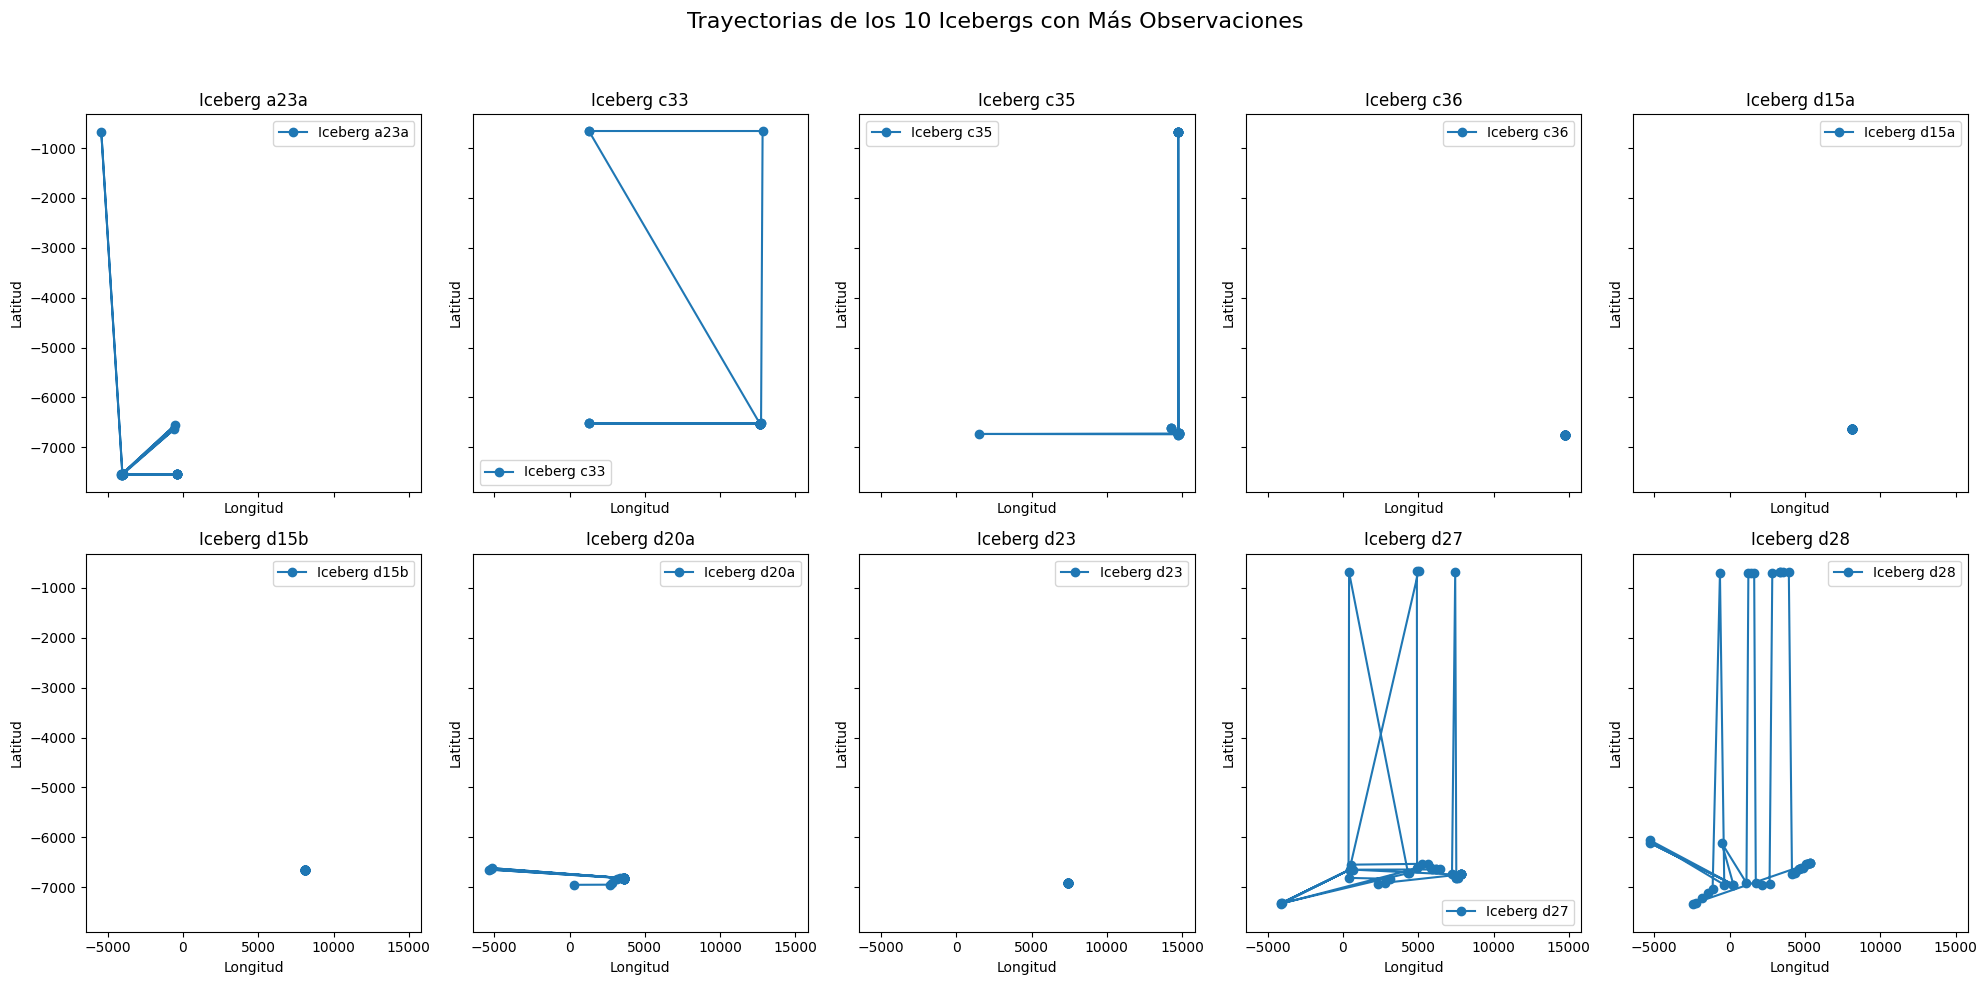

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10), sharex=True, sharey=True)
fig.suptitle("Trayectorias de los 10 Icebergs con Más Observaciones", fontsize=16)

axes = axes.flatten()

for i, (iceberg_id, group) in enumerate(df_top_icebergs.groupby('iceberg_id')):
    ax = axes[i]
    ax.plot(group['longitude'], group['latitude'], marker='o', label=f'Iceberg {iceberg_id}')
    ax.set_title(f"Iceberg {iceberg_id}")
    ax.set_xlabel("Longitud")
    ax.set_ylabel("Latitud")
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

In [35]:
import folium
import random
import re

In [52]:
icebergs_mas_grandes = ['b15ab','a76','a23a', 'a68a', 'a68e','b09b', 'b09g', 'd31','d28', 'd27']

df_icebergs_mas_grandes = df_icebergs.loc[df_icebergs.loc[:, "iceberg_id"].isin(icebergs_mas_grandes)]
df_icebergs_mas_grandes

,date,iceberg_id,recent_observation,longitude,latitude,dms_longitude,dms_latitude
0,02/12/21,a23a,02/09/21,-400.0,-7545.0,40 0'W,75 45'S
3,02/12/21,a68a,02/07/21,-346.0,-5658.0,34 6'W,56 58'S
4,02/12/21,a68e,02/09/21,-385.0,-5255.0,38 5'W,52 55'S
18,02/12/21,b09b,02/09/21,14322.0,-6614.0,143 22'E,66 14'S
19,02/12/21,b09g,02/09/21,4147.0,-680.0,41 47'E,68 0'S
...,...,...,...,...,...,...,...
1760,09/01/23,b09g,08/19/23,4146.0,-6811.0,41 46'E,68 11'S
1761,09/01/23,b15ab,08/19/23,-1235.0,-7140.0,12 35'W,71 40'S
1785,09/01/23,d27,08/19/23,-4123.0,-7328.0,41 23'W,73 28'S
1786,09/01/23,d28,08/19/23,-5313.0,-6057.0,53 13'W,60 57'S


In [49]:
df_icebergs_mas_grandes.loc[df_icebergs_mas_grandes.loc[:, 'date'] == '03/03/21']

,date,iceberg_id,recent_observation,longitude,latitude,dms_longitude,dms_latitude
356,03/03/21,a23a,03/01/21,-400.0,-7545.0,40 0'W,75 45'S
359,03/03/21,a68a,02/21/21,-3314.0,-5655.0,33 14'W,56 55'S
370,03/03/21,b09b,03/02/21,14311.0,-6619.0,143 11'E,66 19'S
371,03/03/21,b09g,03/02/21,4143.0,-684.0,41 43'E,68 4'S
373,03/03/21,b15ab,03/02/21,518.0,-661.0,51 8'E,66 1'S
403,03/03/21,d27,03/02/21,7619.0,-6816.0,76 19'E,68 16'S
404,03/03/21,d28,03/02/21,4733.0,-6620.0,47 33'E,66 20'S


In [54]:
unique_icebergs = df_icebergs_mas_grandes['iceberg_id'].unique()
iceberg_colors = {iceberg_id: "#{:06x}".format(random.randint(0, 0xFFFFFF)) for iceberg_id in unique_icebergs}


mapa = folium.Map(
    location=[-70, -30], 
    zoom_start=3, 
    tiles="OpenStreetMap", 
    attr="Map data © OpenStreetMap contributors"
)


for _, row in df_icebergs_mas_grandes.iterrows():
    iceberg_id = row['iceberg_id']
    color = iceberg_colors[iceberg_id]  
    folium.CircleMarker(
        location=[row['latitude'] / 100, row['longitude'] / 100],  
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        tooltip=f"Iceberg {iceberg_id} ({row['date']})"
    ).add_to(mapa)

mapa.save("mapa_icebergs.html")
mapa